In [1]:
import os
import tarfile
import urllib
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

DATASET_PATH = os.path.join("datasets", "ytbalgo")
COUNTRY_NAMES = ["CA", "DE", "FR", "GB", "IN", "JP", "KR", "MX", "RU", "US"]
LATIN_COUNTRY_NAMES = ["CA", "DE", "FR", "GB", "IN", "US"]

In [2]:
def load_dataset(country, dataset_path = DATASET_PATH):
    csv_path=os.path.join(dataset_path, country.upper()+"videos.csv")
    return pd.read_csv(csv_path, encoding="UTF-8", encoding_errors="ignore")

In [3]:
ca_df = load_dataset("ca")
de_df = load_dataset("de")
fr_df = load_dataset("fr")
gb_df = load_dataset("gb")
in_df = load_dataset("in")
jp_df = load_dataset("jp")
kr_df = load_dataset("kr")
mx_df = load_dataset("mx")
ru_df = load_dataset("ru")
us_df = load_dataset("us")

complete_df = pd.concat([ca_df, de_df, fr_df, gb_df, in_df, jp_df, kr_df, mx_df, ru_df, us_df])

In [4]:
complete_df.drop(columns= "thumbnail_link", inplace=True)
complete_df.drop_duplicates(subset=["video_id"], inplace=True)

In [5]:
complete_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,False,False,False,Sheldon is roasting pastor of the church\nyoun...


In [6]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184287 entries, 0 to 40766
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                184287 non-null  object
 1   trending_date           184287 non-null  object
 2   title                   184287 non-null  object
 3   channel_title           184287 non-null  object
 4   category_id             184287 non-null  int64 
 5   publish_time            184287 non-null  object
 6   tags                    184287 non-null  object
 7   views                   184287 non-null  int64 
 8   likes                   184287 non-null  int64 
 9   dislikes                184287 non-null  int64 
 10  comment_count           184287 non-null  int64 
 11  comments_disabled       184287 non-null  bool  
 12  ratings_disabled        184287 non-null  bool  
 13  video_error_or_removed  184287 non-null  bool  
 14  description             171115 non-nu

In [7]:
#Takes dataframe as vairable, randomly shuffles df and slices according to test_ratio
#returns two lists those contains indices of test set and train set

def split_train_test(dataframe):
    test_ratio = 0.2
    
    np.random.seed(420)
    shuffled_indices = np.random.permutation(len(dataframe))
    test_set_size = int(len(dataframe) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return dataframe.iloc[train_indices], dataframe.iloc[test_indices]

In [8]:
#Takes a video's title as parameter,
#returns a list that contains indexes of all the videos those shares at least count_of_common_tags

def related_tagged_videos(title):
    count_of_common_tags = 1
    
    video_tag_list=[]
    vid_index = 0
    possible_rec_videos=[]
    
    for index, row in complete_df.iterrows():
        if row["title"] == title:
            vid_index = index
            video_tag_list = row["tags"].split("|")
            break
    
    for index, row in complete_df.iterrows():
        if complete_df.iloc[vid_index,0] != complete_df.iloc[index,0]:
            temp_video_tag_list = row["tags"].split("|")
            if len(list(set(temp_video_tag_list) & set(video_tag_list))) >= count_of_common_tags:
                possible_rec_videos.append(index)
    
    return possible_rec_videos

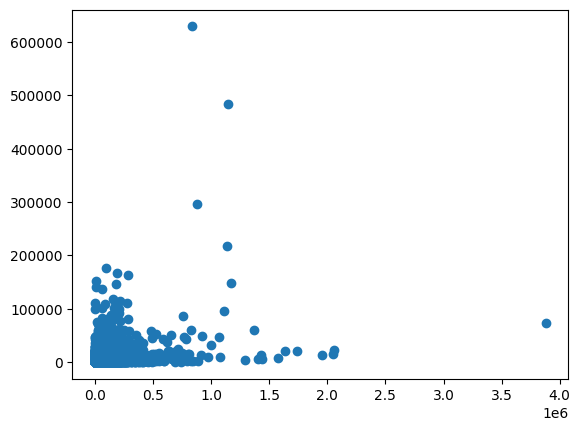

In [40]:
def correlation_plotter(featureX, featureY):
    
    featureX_index = complete_df.columns.get_indexer([featureX])
    featureY_index = complete_df.columns.get_indexer([featureY])
    
    numpydf = complete_df.to_numpy()
    
    setX = numpydf[:, featureX_index]
    setY = numpydf[:, featureY_index]
    
    plt.scatter(setX, setY)
    
correlation_plotter("likes", "dislikes")